In [30]:
import pandas as pd
import numpy as np
from benchmarks import *
import glob
import os, sys
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# for each of the programs/prob sizes in the explorData directory,
# load up all their CSV data

os.chdir(ROOT_DIR+'/explorData')

# extract the names and problem sizes of the done codes
dirs = list(os.listdir())

doneRuns = {}

for dir in dirs:
	progname = dir.split('-')[0]
	probsize = dir.split('-')[1]

	allJobs = glob.glob('./'+dir+'/allUniquePointsToSample.csv')[0]
	doneFiles = glob.glob('./'+dir+'/*/complete.csv')

	allData = pd.read_csv(allJobs)

	doneData = pd.DataFrame(columns=['xtime']+list(allData.columns))

	# join all the done files into one csv
	for doneFile in doneFiles:
		comp = pd.read_csv(doneFile)
		doneData = pd.concat([doneData, comp], ignore_index=True)

	doneData = doneData.reset_index(drop=True)

	# if we have all the data, let's analyze it
	if doneData.shape[0] == allData.shape[0]:
		print(progname, probsize, end='\t')
		print(doneData.shape, allData.shape)
		doneRuns[dir] = {'progname':progname, 'probsize': probsize, 'df':doneData}
	else:
		print('\t', progname, probsize, end='\t')
		print('incomplete data! Need to re-run', doneData.shape[0], allData.shape[0])





	 bt_nas smlprob	incomplete data! Need to re-run 538 1188
cg_nas smlprob	(1188, 6) (1188, 5)
ft_nas smlprob	(1188, 6) (1188, 5)
bfs_rodinia smlprob	(1188, 6) (1188, 5)
hpcg smlprob	(1188, 6) (1188, 5)
	 lulesh smlprob	incomplete data! Need to re-run 1134 1188
	 cfd_rodinia smlprob	incomplete data! Need to re-run 1165 1188
	 bt_nas medprob	incomplete data! Need to re-run 976 1188
cg_nas medprob	(1188, 6) (1188, 5)
ft_nas medprob	(1188, 6) (1188, 5)
bfs_rodinia medprob	(1188, 6) (1188, 5)
hpcg medprob	(1188, 6) (1188, 5)
lulesh medprob	(1188, 6) (1188, 5)
cfd_rodinia medprob	(1188, 6) (1188, 5)
	 bt_nas lrgprob	incomplete data! Need to re-run 534 1188
cg_nas lrgprob	(1188, 6) (1188, 5)
ft_nas lrgprob	(1188, 6) (1188, 5)
	 bfs_rodinia lrgprob	incomplete data! Need to re-run 696 1188


cg_nas smlprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
344              140        spread       static  1.880000
322              140         close       static  1.883333
234              100         close       static  2.013333
256              100        spread       static  2.033333
278              120         close       static  2.063333
328              140         close    static,64  2.080000
350              140        spread    static,64  2.086667
300              120        spread       static  2.090000
259              100        spread   static,256  2.106667
237              100         close   static,256  2.116667


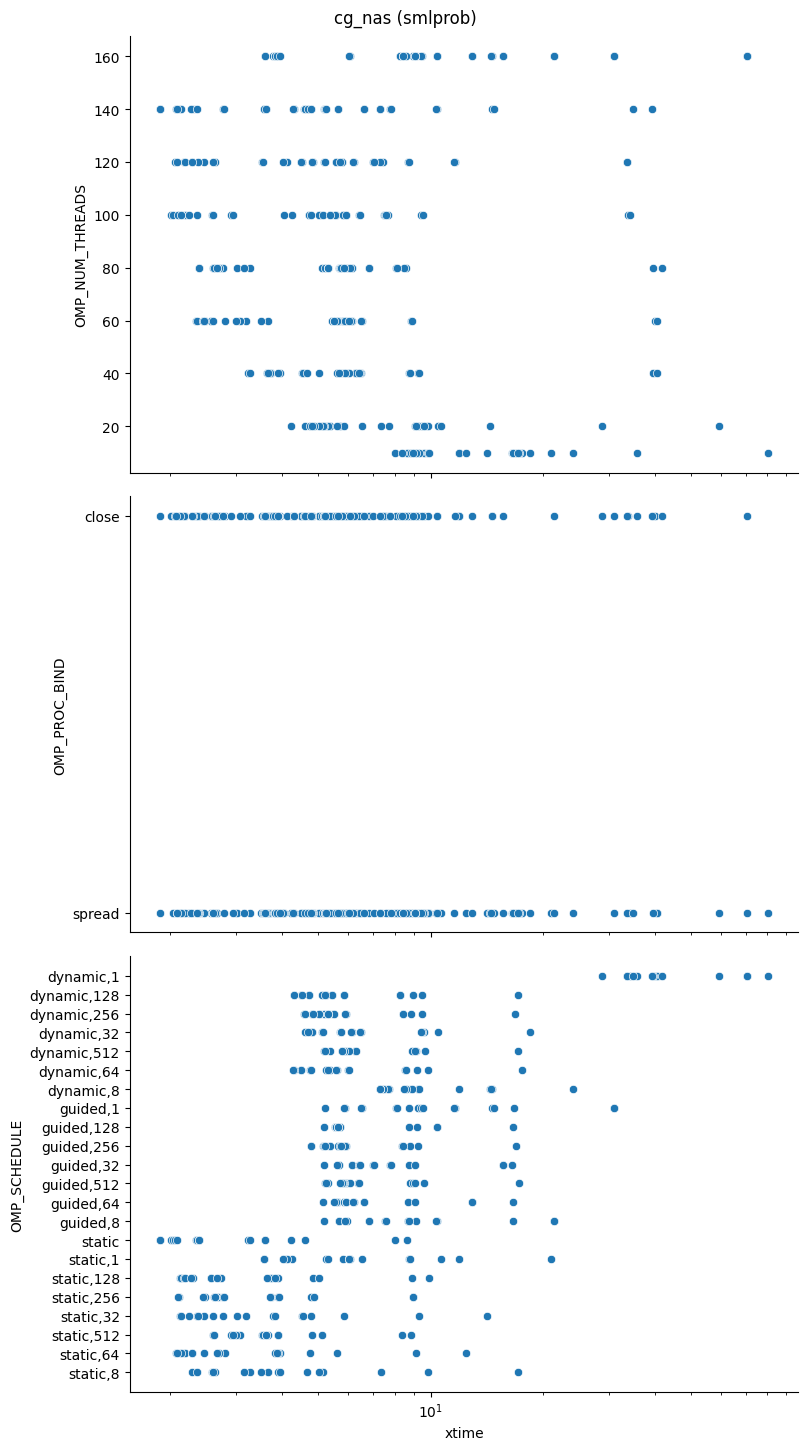

ft_nas smlprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
322              140         close       static  1.736667
132               60         close    dynamic,1  1.743333
161               60        spread     guided,1  1.746667
344              140        spread       static  1.750000
323              140         close     static,1  1.753333
345              140        spread     static,1  1.753333
139               60         close     guided,1  1.756667
95                40         close     guided,1  1.760000
110               40        spread    dynamic,1  1.760000
88                40         close    dynamic,1  1.763333


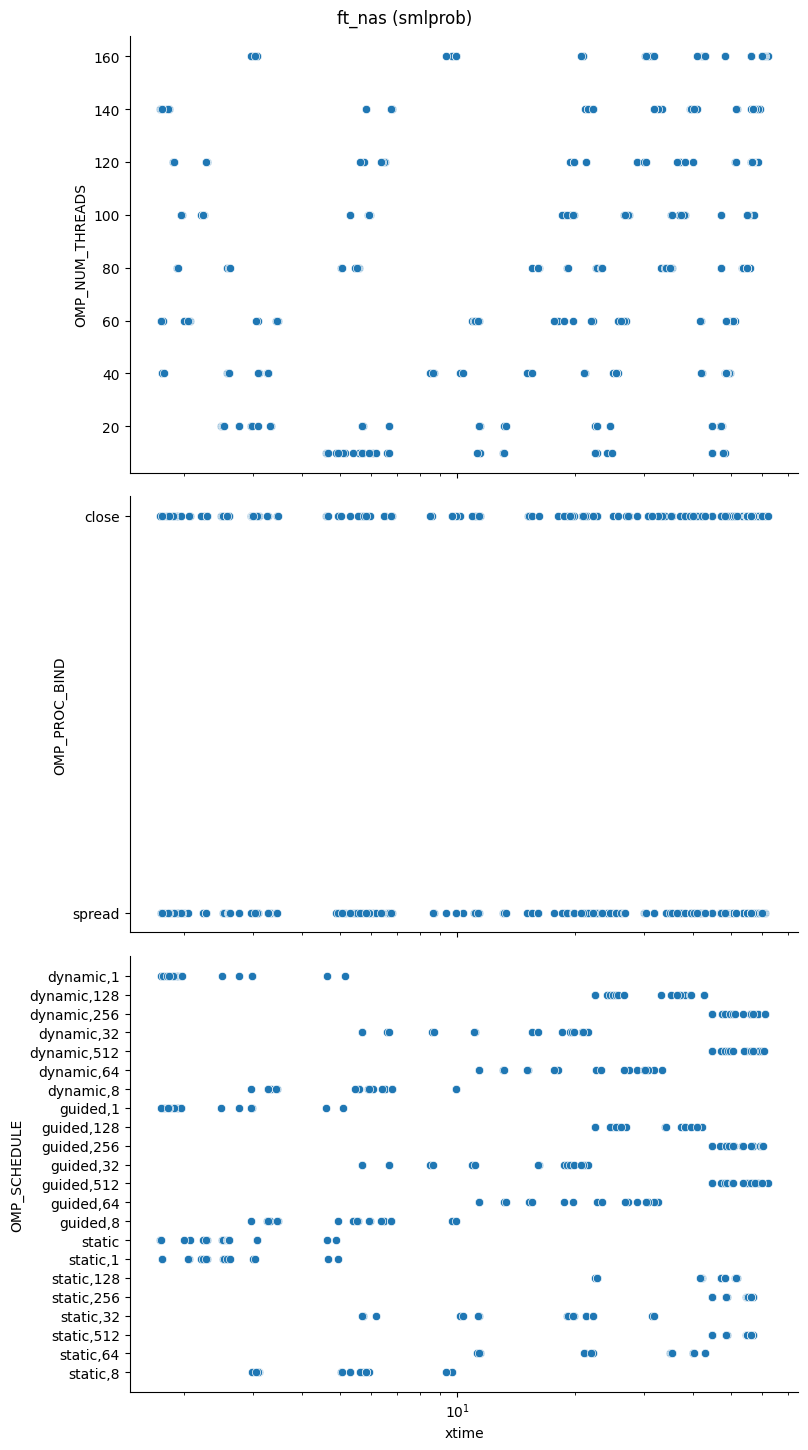

bfs_rodinia smlprob
    OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
4                10         close  dynamic,512  0.018604
12               10         close    guided,64  0.018722
14               10         close       static  0.018806
9                10         close   guided,256  0.018820
7                10         close     guided,1  0.018884
3                10         close   dynamic,32  0.018893
10               10         close    guided,32  0.018898
8                10         close   guided,128  0.018899
5                10         close   dynamic,64  0.018910
30               10        spread   guided,128  0.018922


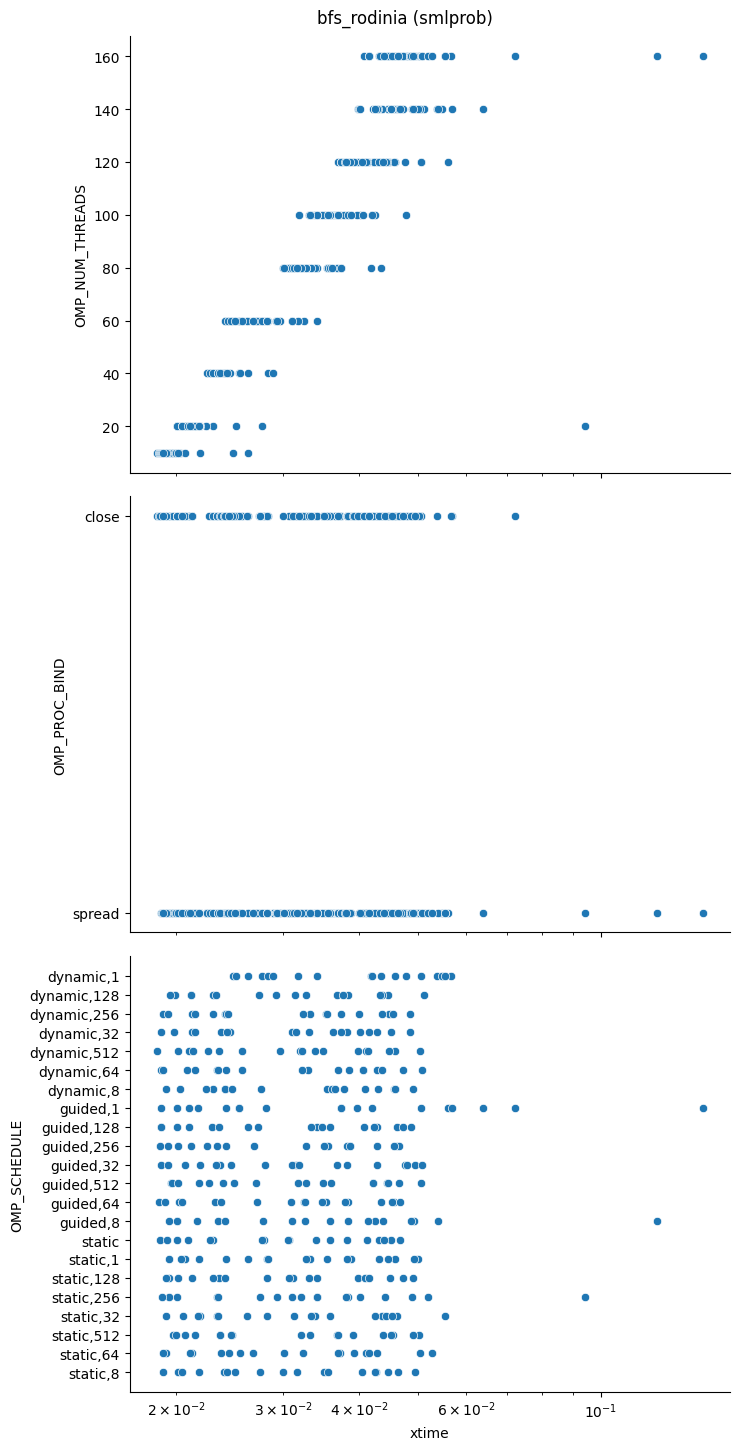

hpcg smlprob
    OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
61               20         close   static,256  0.247674
64               20         close    static,64  0.247890
60               20         close   static,128  0.247981
58               20         close       static  0.248161
63               20         close   static,512  0.248670
62               20         close    static,32  0.249193
14               10         close       static  0.251521
17               10         close   static,256  0.251810
19               10         close   static,512  0.252131
16               10         close   static,128  0.252706


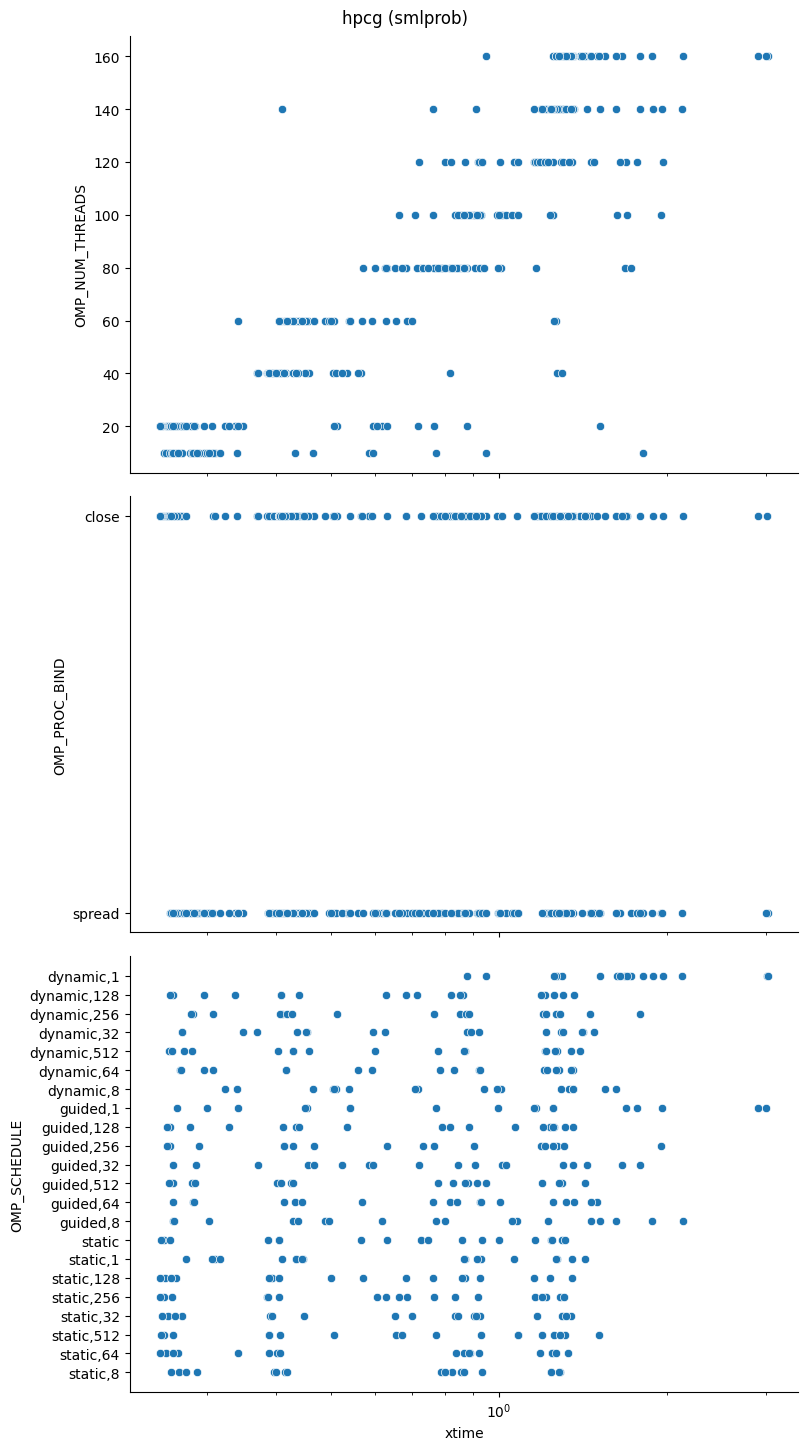

cg_nas medprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
322              140         close       static  6.543333
344              140        spread       static  6.586667
328              140         close    static,64  6.963333
350              140        spread    static,64  7.026667
346              140        spread   static,128  7.116667
300              120        spread       static  7.143333
324              140         close   static,128  7.163333
278              120         close       static  7.173333
234              100         close       static  7.176667
256              100        spread       static  7.233333


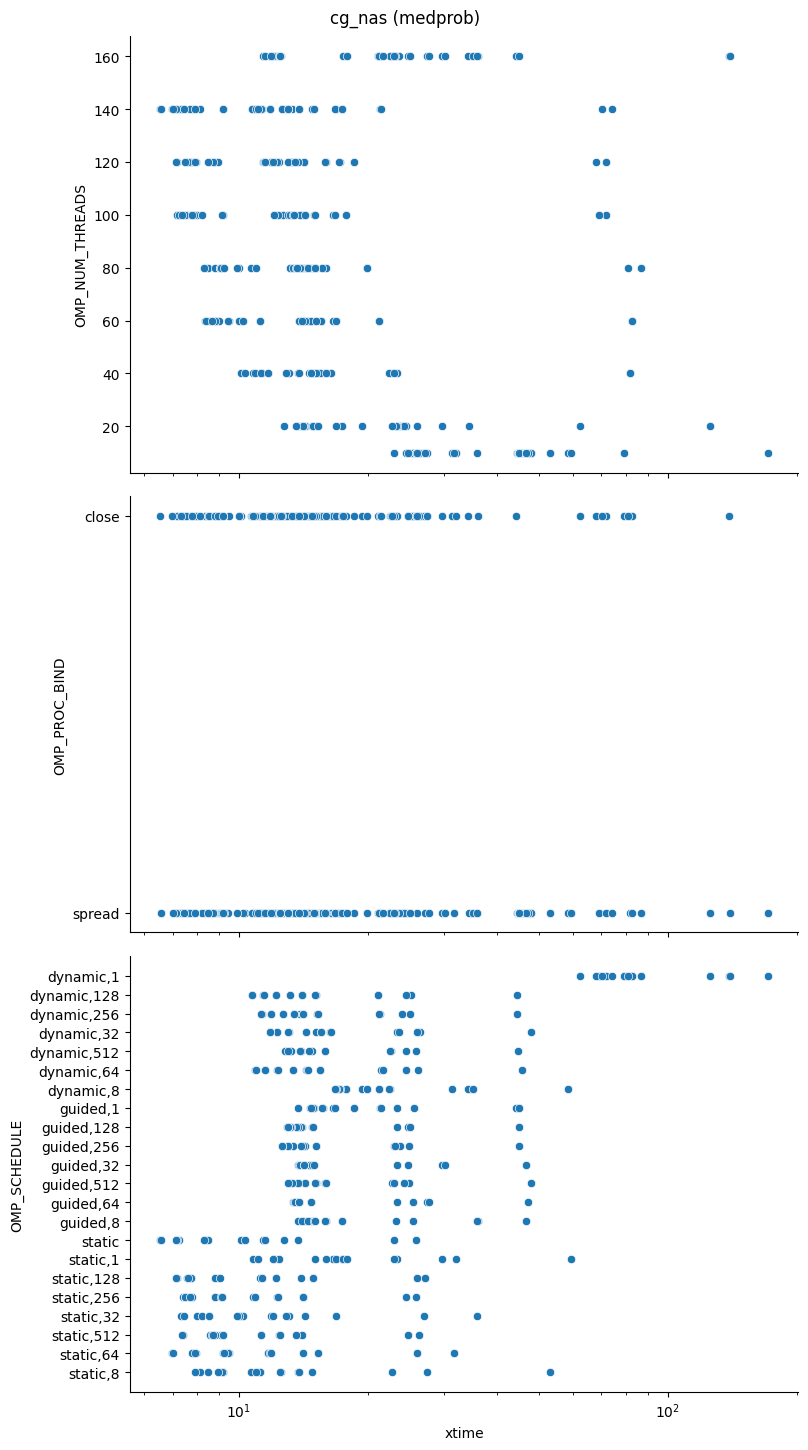

ft_nas medprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
242              100        spread    dynamic,1  7.093333
249              100        spread     guided,1  7.113333
227              100         close     guided,1  7.116667
198               80        spread    dynamic,1  7.166667
183               80         close     guided,1  7.170000
176               80         close    dynamic,1  7.176667
161               60        spread     guided,1  7.180000
205               80        spread     guided,1  7.200000
154               60        spread    dynamic,1  7.206667
139               60         close     guided,1  7.223333


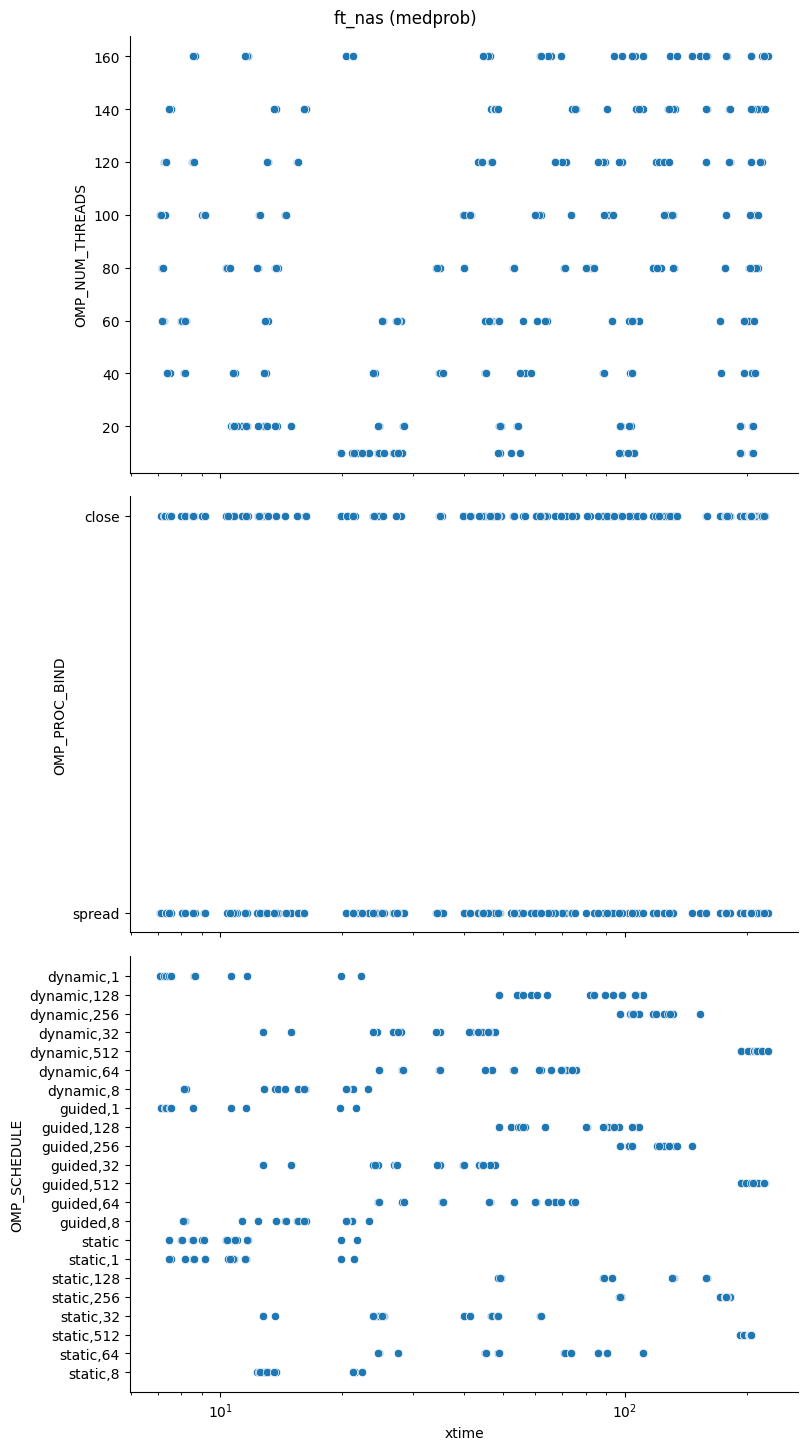

bfs_rodinia medprob
    OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
14               10         close       static  0.020487
39               10        spread   static,256  0.020678
2                10         close  dynamic,256  0.020743
9                10         close   guided,256  0.020785
36               10        spread       static  0.020875
38               10        spread   static,128  0.020878
33               10        spread   guided,512  0.020951
31               10        spread   guided,256  0.021002
34               10        spread    guided,64  0.021034
19               10         close   static,512  0.021094


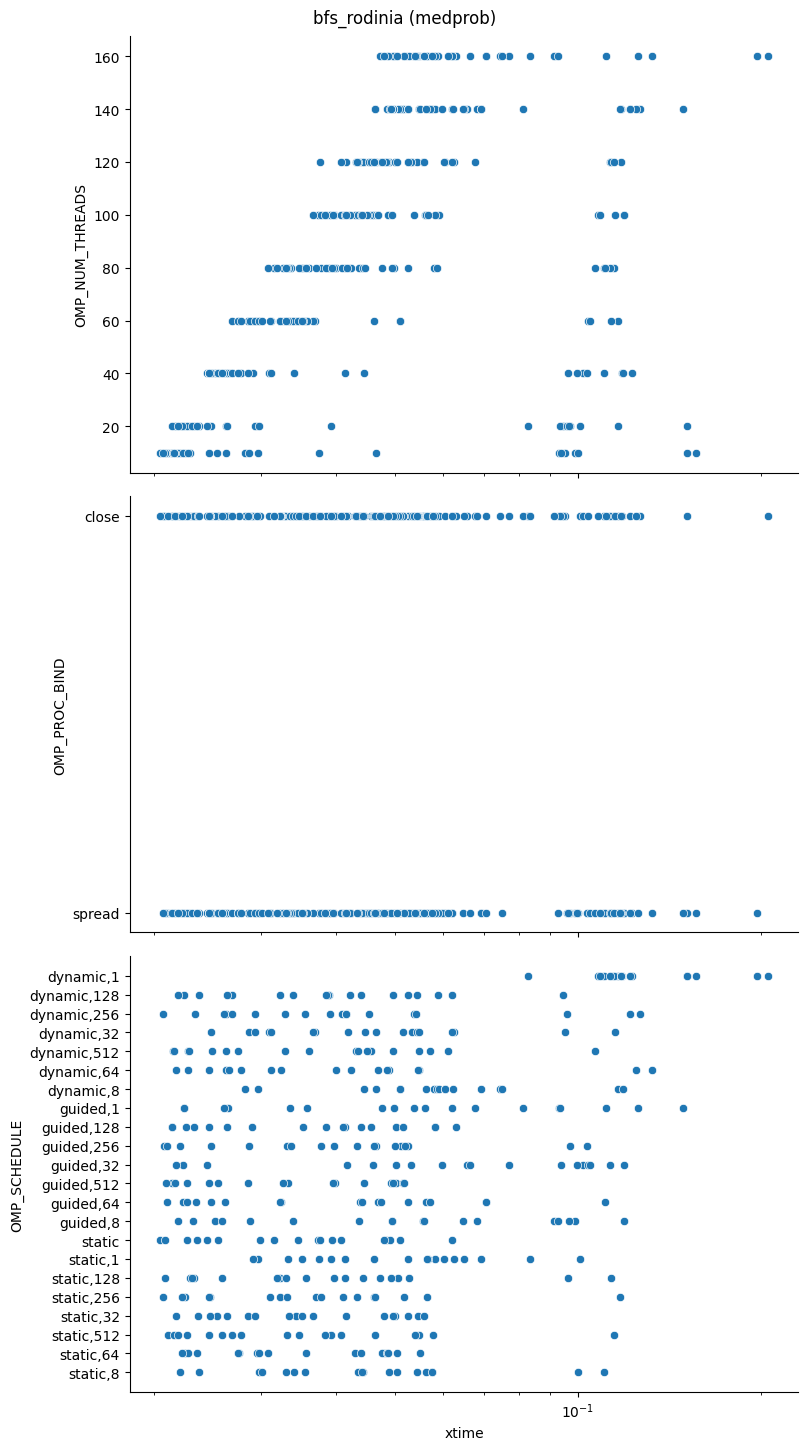

hpcg medprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE      xtime
1                 10         close  dynamic,128  29.020500
5                 10         close   guided,128  29.840650
308              140         close   static,256  32.430300
172               80         close    dynamic,8  34.555000
59                20         close   static,512  34.892650
56                20         close   static,128  35.033933
15                10         close    static,32  35.056800
112               40        spread     guided,1  35.056900
6                 10         close   guided,256  35.104267
17                10         close    static,64  35.639867


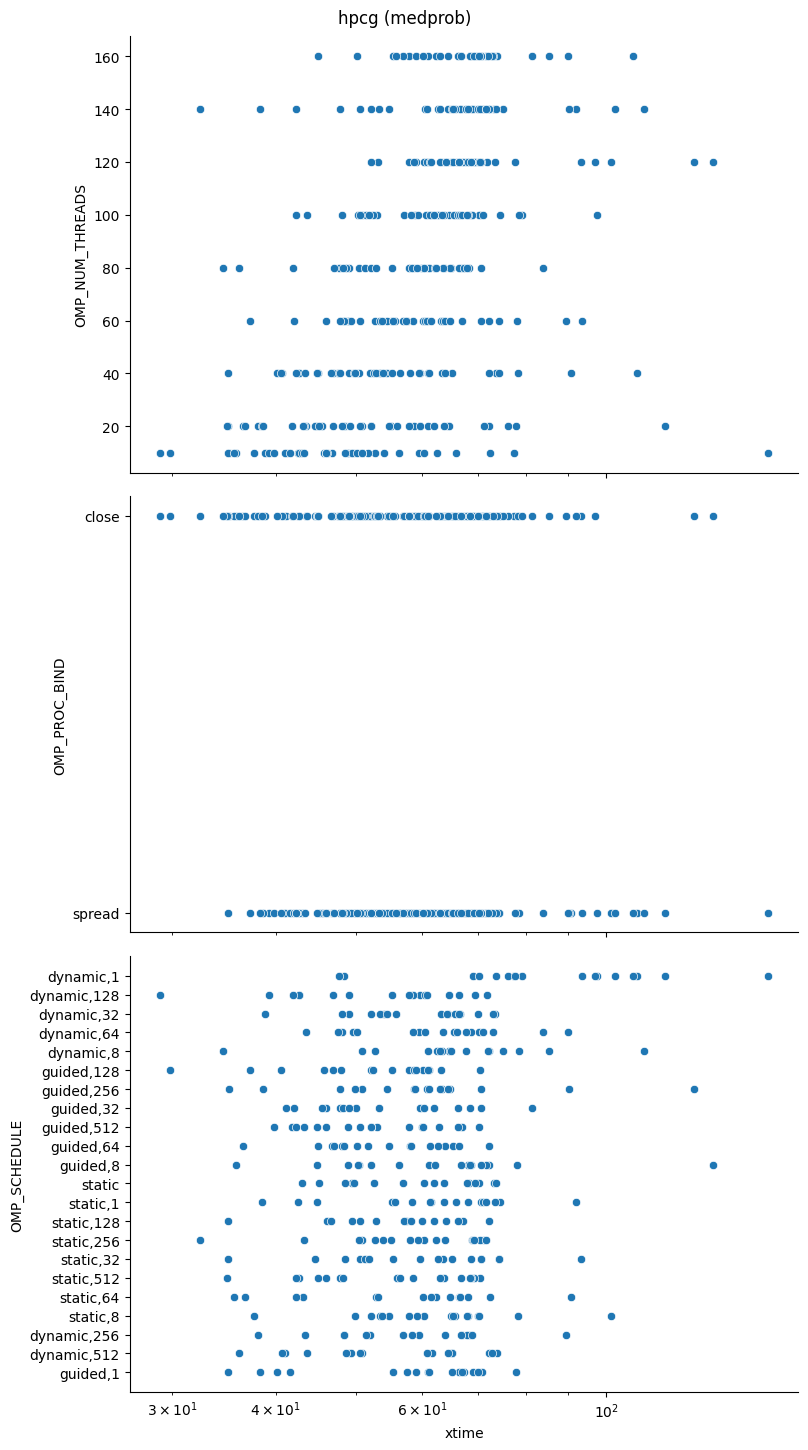

lulesh medprob
    OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE      xtime
14               10         close       static  11.315089
58               20         close       static  11.415805
16               10         close   static,128  12.640185
17               10         close   static,256  12.882241
64               20         close    static,64  12.891987
20               10         close    static,64  13.043218
60               20         close   static,128  13.189101
61               20         close   static,256  13.514461
62               20         close    static,32  13.599788
18               10         close    static,32  14.000622


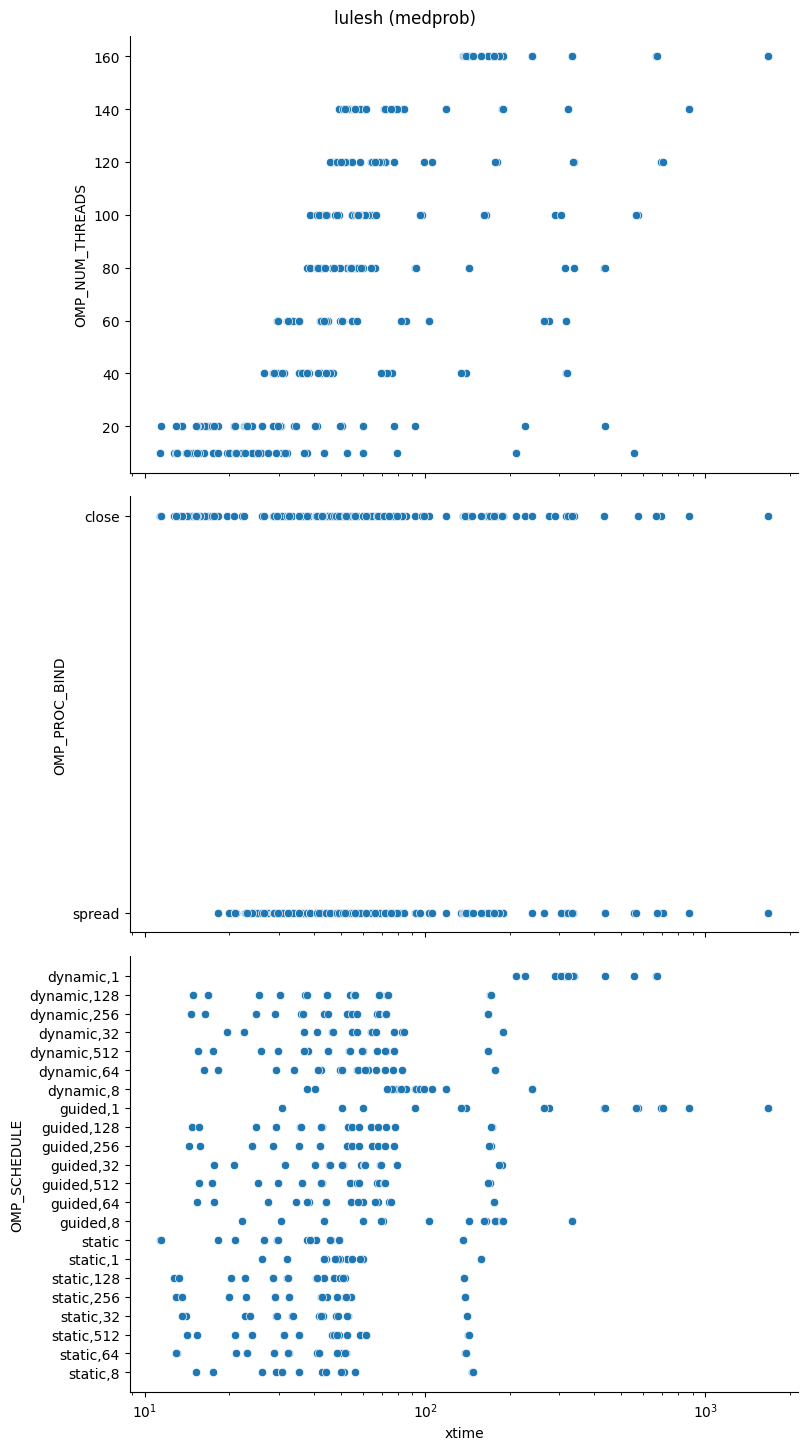

cfd_rodinia medprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE      xtime
322              140         close       static  11.883333
344              140        spread       static  12.195167
300              120        spread       static  13.831600
278              120         close       static  13.945467
234              100         close       static  15.383700
256              100        spread       static  15.450867
323              140         close     static,1  16.450333
345              140        spread     static,1  16.792433
249              100        spread     guided,1  17.172533
227              100         close     guided,1  17.218367


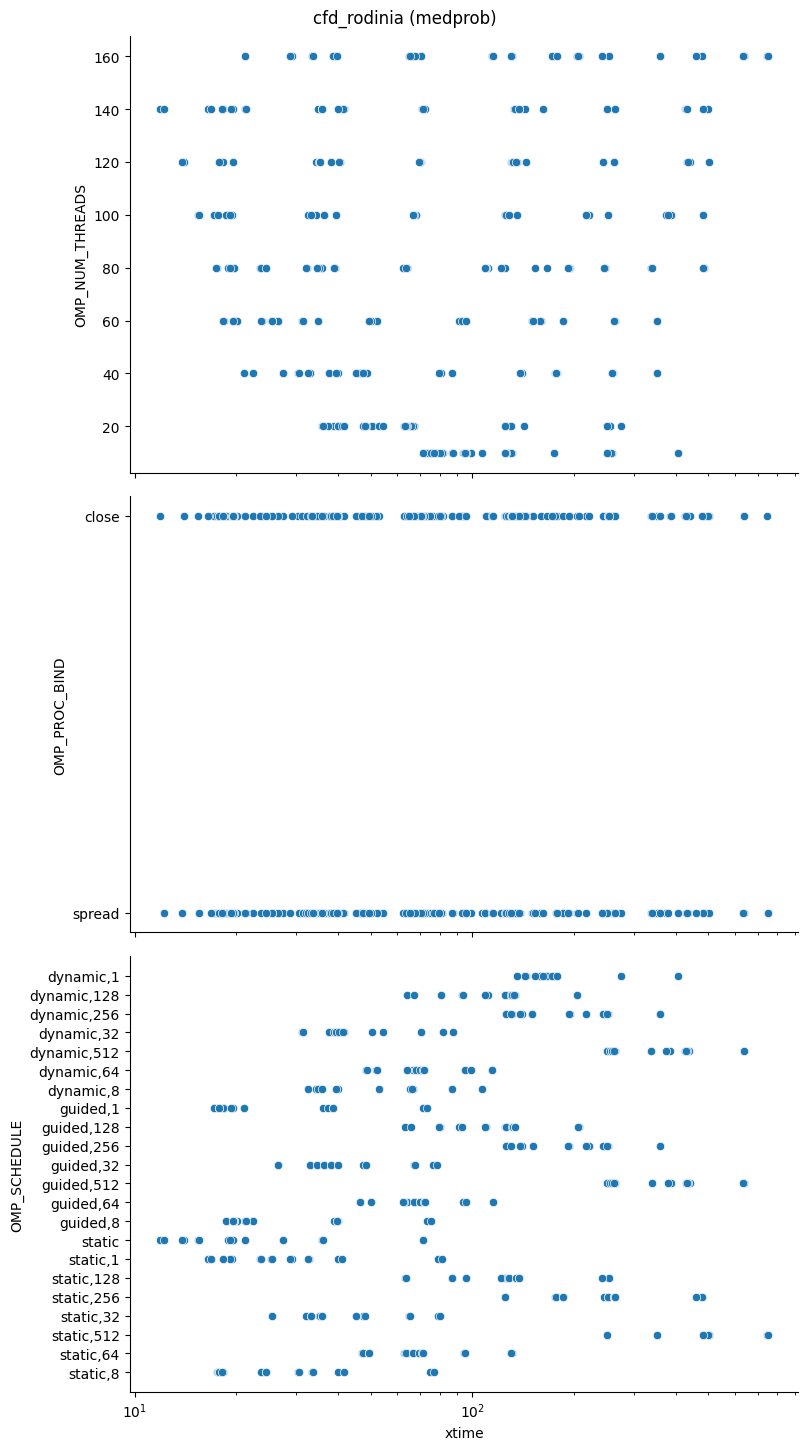

cg_nas lrgprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE       xtime
322              140         close       static  327.426667
344              140        spread       static  329.596667
327              140         close   static,512  330.953333
328              140         close    static,64  332.873333
350              140        spread    static,64  334.510000
325              140         close   static,256  334.586667
346              140        spread   static,128  334.723333
347              140        spread   static,256  334.880000
349              140        spread   static,512  337.430000
348              140        spread    static,32  337.763333


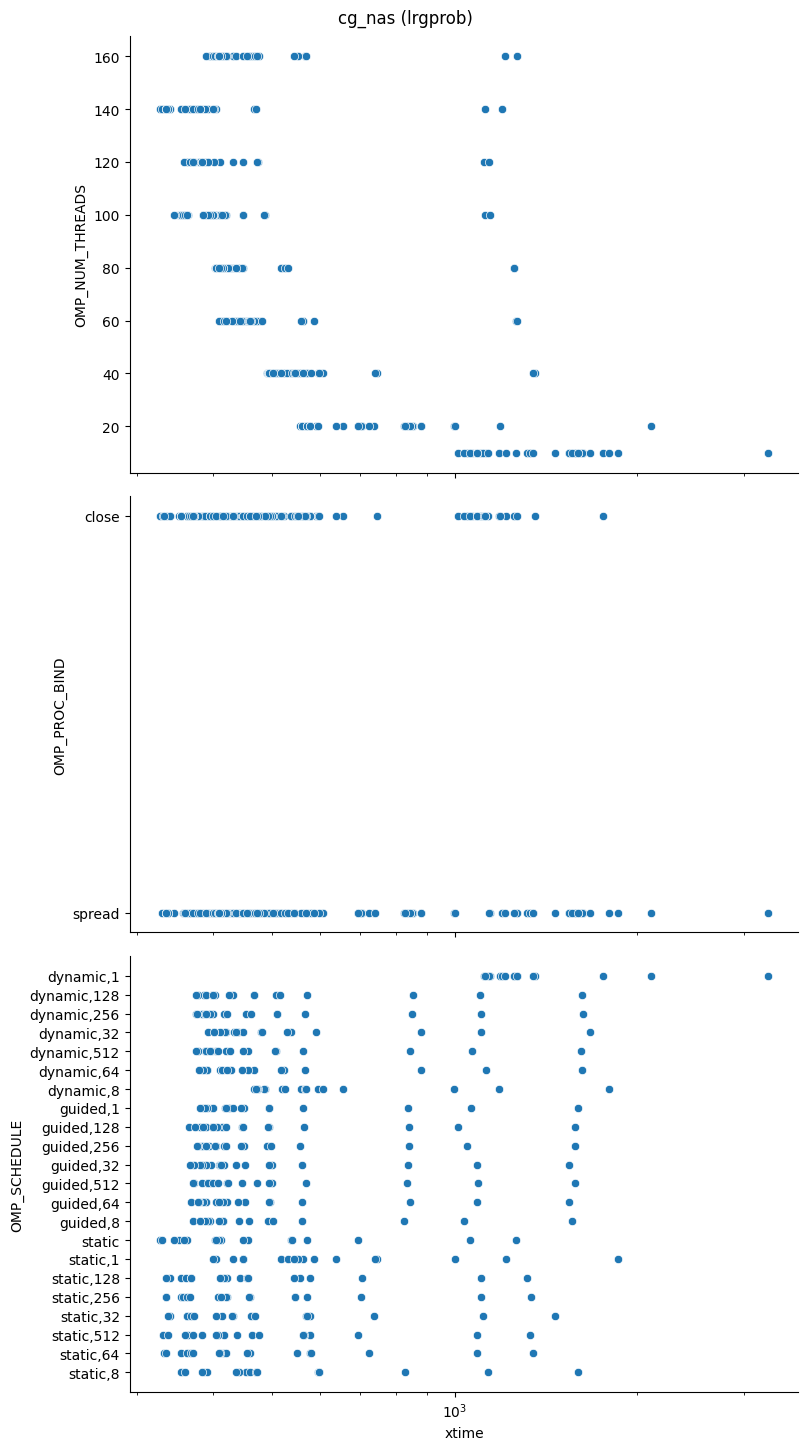

ft_nas lrgprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE       xtime
161               60        spread     guided,1  155.746667
139               60         close     guided,1  155.776667
117               40        spread     guided,1  157.126667
110               40        spread    dynamic,1  157.316667
88                40         close    dynamic,1  157.333333
95                40         close     guided,1  157.560000
132               60         close    dynamic,1  157.720000
154               60        spread    dynamic,1  157.726667
198               80        spread    dynamic,1  164.810000
176               80         close    dynamic,1  165.583333


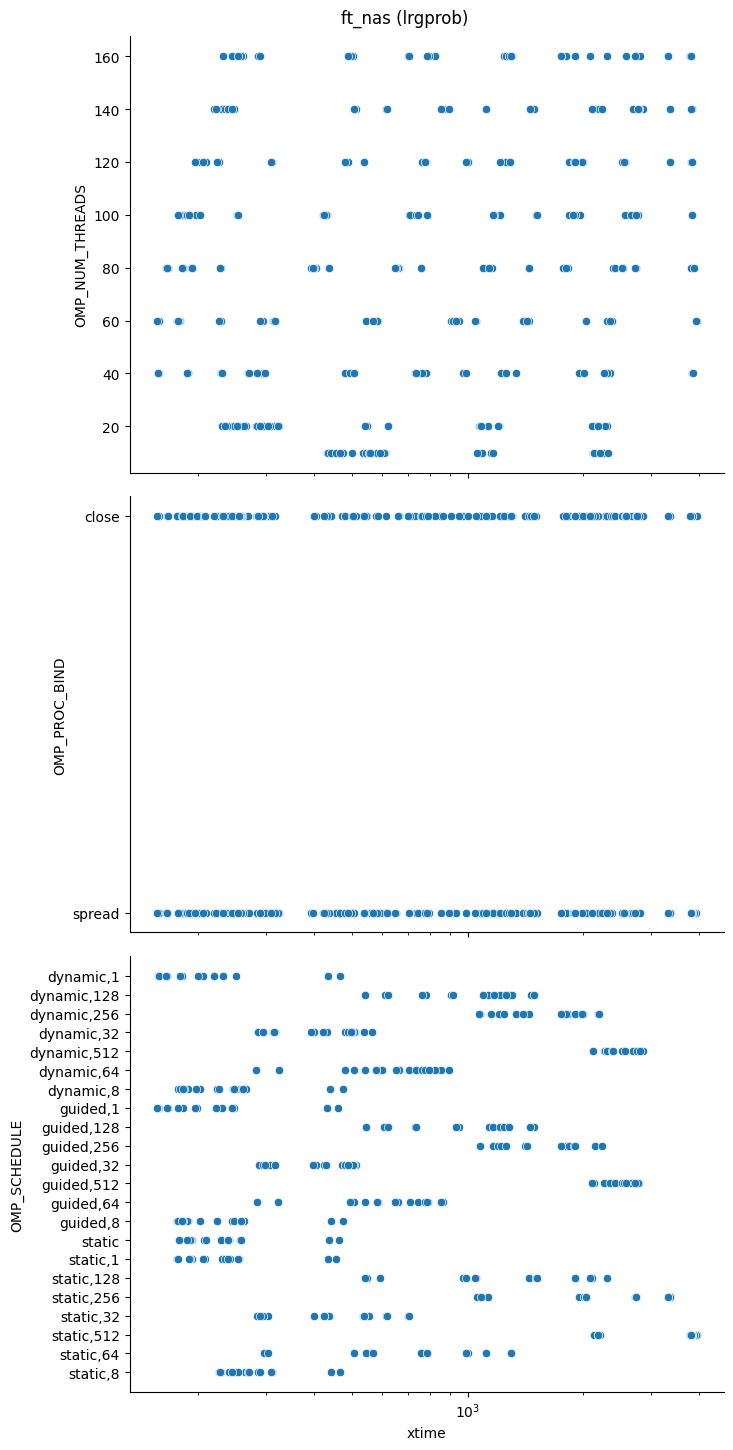

In [54]:
# for each complete run, let's plot the data

for key,values in doneRuns.items():
	progname = values['progname']
	probsize = values['probsize']
	df = values['df'].copy(deep=True)

	# drop any -1 values
	df = df[df['xtime'] != -1.0]

	# drop the progname and probsize columns
	df = df.drop(columns=['progname', 'probsize'])

	#print(df.head(), df.shape)

	hparams = list(df.columns)
	hparams.remove('xtime')

	# average out the xtimes
	avrgd = df.groupby(hparams).mean().reset_index()

	print(progname, probsize)
	# best xtime configs
	print(avrgd.sort_values(by=['xtime']).head(10))

	# let's create multiple 2D plots of the xtimes
	pp = sns.pairplot(avrgd, y_vars=hparams, x_vars=['xtime'])
	pp.fig.set_size_inches(15,15)
	pp.fig.suptitle(progname+' ('+probsize+')', x=0.7, y=0.999)

	for ax in pp.axes.flat:
		if ax.get_ylabel() in hparams:
			ax.set(xscale='log')

	plt.show()


	
	
